Found: [(0, 2), (1, 2), (2, 1), (3, 1), (4, 2), (5, 3), (6, 3), (7, 2), (8, 3), (8, 4), (8, 5), (7, 6)]
Number of moves: 12


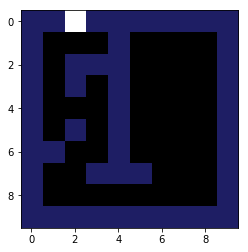

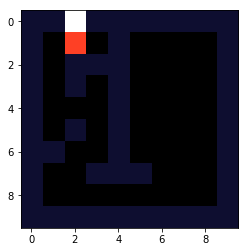

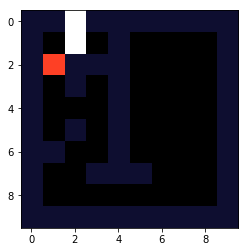

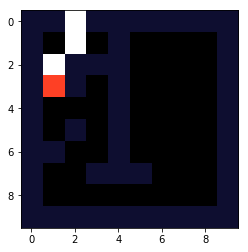

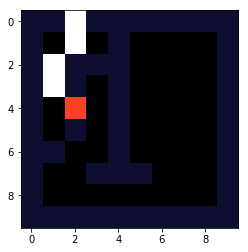

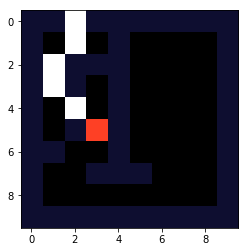

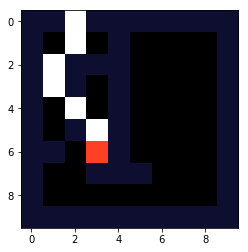

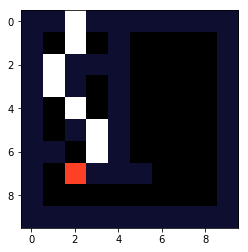

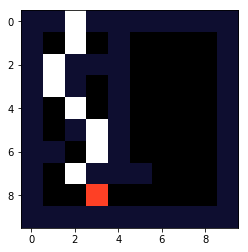

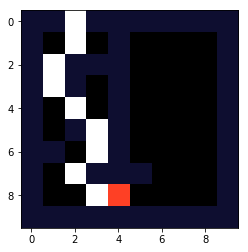

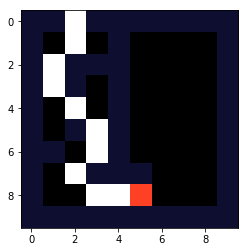

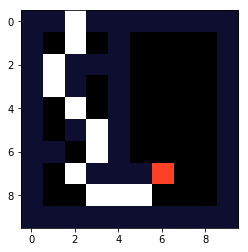

In [4]:
# A* Search


import matplotlib.pyplot as plt

class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position


def astar(maze, start, end):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] # Return reversed path

        # Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)



maze = [[1, 1, 0, 1, 1, 1, 1, 1, 1, 1],    
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
        [1, 0, 1, 1, 1, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
        [1, 1, 0, 0, 1, 0, 0, 0, 0, 1],
        [1, 0, 0, 1, 1, 1, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

   

    
start = (0, 2)
end = (7, 6)

path = astar(maze, start, end)
print ("Found: " + str(path))
print ("Number of moves: " + str(len(path)))

for i, j in path:
    maze[i][j] = 10
    
    plt.imshow(maze, cmap=plt.cm.CMRmap,animated=True)
    plt.show() 
    
    maze[i][j] = 20


In [5]:
# BFS Search
import queue

def createMaze2():
    maze = []
    maze.append(["#","#", "O", "#", "#", "#", "#", "#", "#", "#"])
    maze.append(["#"," ", " ", " ", "#", " ", " ", " ", " ", "#"])
    maze.append(["#"," ", "#", "#", "#", " ", " ", " ", " ", "#"])
    maze.append(["#"," ", " ", " ", "#", " ", " ", " ", " ", "#"])
    maze.append(["#"," ", "#", " ", "#", " ", " ", " ", " ", "#"])
    maze.append(["#","#", " ", " ", "#", " ", " ", " ", " ", "#"])
    maze.append(["#"," ", " ", " ", "#", " ", " ", " ", " ", "#"])
    maze.append(["#"," ", " ", "#", "#", "#", "X", " ", " ", "#"])
    maze.append(["#"," ", " ", " ", " ", " ", " ", " ", " ", "#"])
    maze.append(["#","#", "#", "#", "#", "#", "#", "#", "#", "#"])
    return maze


def printMaze(maze, path=""):
    for x, pos in enumerate(maze[0]):
        if pos == "O":
            start = x

    i = start
    j = 0
    pos = set()
    for move in path:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1
        pos.add((j, i))
    
    for j, row in enumerate(maze):
        for i, col in enumerate(row):
            if (j, i) in pos:
                print("+ ", end="")
            else:
                print(col + " ", end="")
        print()
        


def valid(maze, moves):
    for x, pos in enumerate(maze[0]):
        if pos == "O":
            start = x

    i = start
    j = 0
    for move in moves:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1

        if not(0 <= i < len(maze[0]) and 0 <= j < len(maze)):
            return False
        elif (maze[j][i] == "#"):
            return False

    return True


def findEnd(maze, moves):
    for x, pos in enumerate(maze[0]):
        if pos == "O":
            start = x

    i = start
    j = 0
    for move in moves:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1

    if maze[j][i] == "X":
        print("Found: " + moves)
        print("Number of moves: " + str(len(moves)))
        printMaze(maze, moves)
        return True

    return False


# MAIN ALGORITHM

nums = queue.Queue()
nums.put("")
add = ""
maze  = createMaze2()

while not findEnd(maze, add): 
    add = nums.get()
    #print(add)
    for j in ["L", "R", "U", "D"]:
        put = add + j
        if valid(maze, put):
            nums.put(put)

Found: DLDDRRDDLDDDRRRRU
Number of moves: 17
# # O # # # # # # # 
# + +   #         # 
# + # # #         # 
# + + + #         # 
#   # + #         # 
# # + + #         # 
#   +   #         # 
#   + # # # +     # 
#   + + + + +     # 
# # # # # # # # # # 
